# Analyse of equivalent width

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : April 7th  2022
- last update : 


### Configuration Hb :

    


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

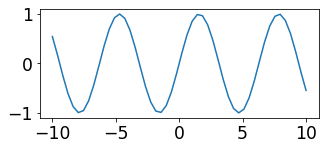

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-05-13'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.8.4'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, HGAMMA, HDELTA,HEPSILON,O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [13]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [14]:
from time import sleep

In [15]:
from astropy.time import Time
import astropy.units as u

# Function

In [16]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [17]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [19]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [20]:
# path index for each month
DATE="20220317"

# Input file

In [21]:
!ls data

equivwidth_20220316_configH.csv  equivwidth_20220317_configHb.csv


In [22]:
df_infos = pd.read_csv("data/equivwidth_20220317_configHb.csv")

### Info on equivalent width summary

In [23]:
df_infos

,idx,num,object,date_obs,airmass,temperature,pressure,humidity,reftime,eqw_h2o,...,eqw_hbeta,eqw_hgamma,eqw_h2o_err,eqw_h2o_2_err,eqw_h2o_3_err,eqw_o2_err,eqw_o2b_err,eqw_halpha_err,eqw_hbeta_err,eqw_hgamma_err
0,0,238,mu. Col,2022-03-18T00:51:22.049,1.115575,8.9,743.45,48.0,0.000000,123.484478,...,2.033181,3.503225,0.867574,0.132206,0.183609,0.073477,0.055829,0.060604,0.033767,0.049224
1,1,244,mu. Col,2022-03-18T00:54:16.312,1.121577,8.9,743.45,49.0,0.048406,128.921038,...,2.082311,3.606314,0.867574,0.132206,0.183609,0.073477,0.055829,0.060604,0.033767,0.049224
2,2,245,mu. Col,2022-03-18T00:54:49.235,1.122727,8.8,743.40,49.0,0.057552,119.048378,...,1.918250,3.175584,0.867574,0.132206,0.183609,0.073477,0.055829,0.060604,0.033767,0.049224
3,3,251,mu. Col,2022-03-18T00:57:47.565,1.129107,8.9,743.40,50.0,0.107088,131.327724,...,-2.914306,-3.373072,0.867574,0.132206,0.183609,0.073477,0.055829,0.060604,0.033767,0.049224
4,4,252,mu. Col,2022-03-18T00:58:20.709,1.130309,8.9,743.40,50.0,0.116294,120.235363,...,1.774554,3.323599,0.867574,0.132206,0.183609,0.073477,0.055829,0.060604,0.033767,0.049224
5,5,265,mu. Col,2022-03-18T01:04:49.716,1.145030,8.9,743.30,53.0,0.224352,125.620156,...,1.829460,3.067518,0.867574,0.132206,0.183609,0.073477,0.055829,0.060604,0.033767,0.049224
6,6,272,mu. Col,2022-03-18T01:08:18.080,1.153339,8.9,743.30,51.0,0.282231,116.998744,...,1.716350,3.421513,0.867574,0.132206,0.183609,0.073477,0.055829,0.060604,0.033767,0.049224
7,7,273,mu. Col,2022-03-18T01:08:50.992,1.154683,8.9,743.35,51.0,0.291373,118.299480,...,2.047368,3.367458,0.867574,0.132206,0.183609,0.073477,0.055829,0.060604,0.033767,0.049224
8,8,279,mu. Col,2022-03-18T01:11:46.031,1.161939,8.9,743.40,53.0,0.339995,111.361090,...,2.043066,3.121306,0.867574,0.132206,0.183609,0.073477,0.055829,0.060604,0.033767,0.049224
9,9,286,mu. Col,2022-03-18T01:15:18.583,1.171053,8.9,743.45,54.0,0.399037,119.111629,...,2.112632,3.000184,0.867574,0.132206,0.183609,0.073477,0.055829,0.060604,0.033767,0.049224


In [24]:
type(df_infos["num"].values[0])

numpy.int64

# Equivalent width SED for mucol

In [25]:
eqw_halpha_sed = 4.47
eqw_hbeta_sed = 4.85
eqw_hgamma_sed = 4.46

# Selection of good spectra

In [26]:
bad_num = [251,300,301,428,429]

In [27]:
bad_indexes = [ df_infos[(df_infos["num"] == k)].index[0] for k in bad_num ]

In [28]:
bad_indexes

[3, 11, 12, 38, 39]

In [29]:
df_infos = df_infos.drop(bad_indexes)

# Plot

Text(0.5, 1.0, 'Equivalent Widths vs date')

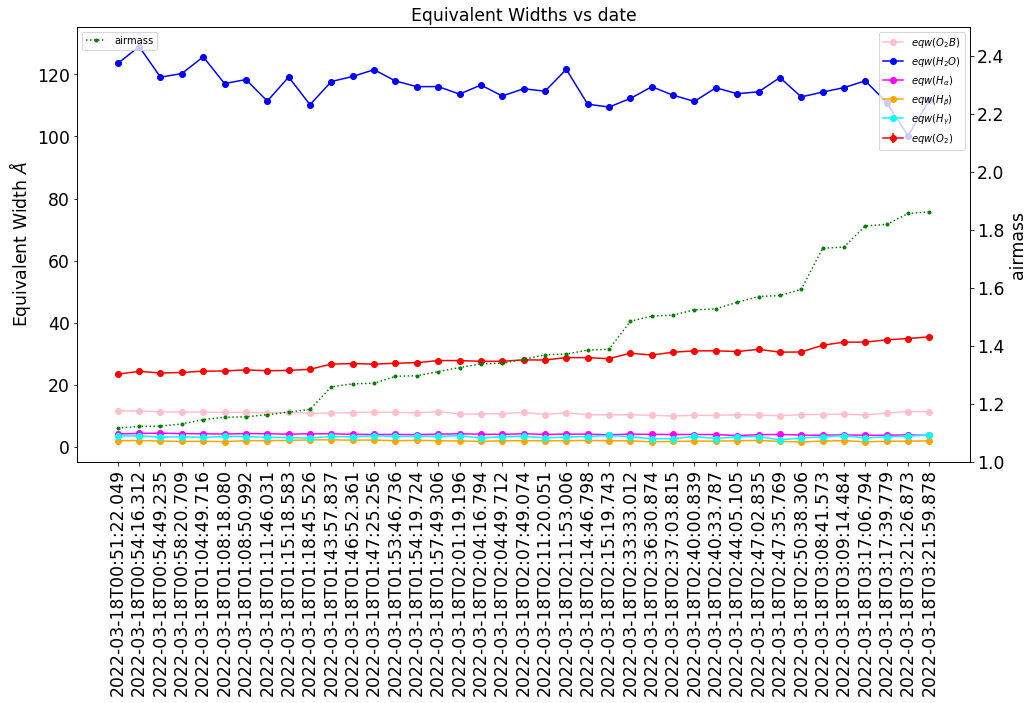

In [30]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
#ax.plot(df_infos['date_obs'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
ax.errorbar(df_infos['date_obs'], df_infos['eqw_o2'],yerr= df_infos['eqw_o2_err'],marker="o",color="red",label="$eqw(O_2)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2B)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
ax.plot(df_infos['date_obs'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
ax.plot(df_infos['date_obs'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
ax2.plot(df_infos['date_obs'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass")
ax2.set_ylim(1,2.5)
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

Text(0.5, 1.0, 'Equivalent Widths vs date')

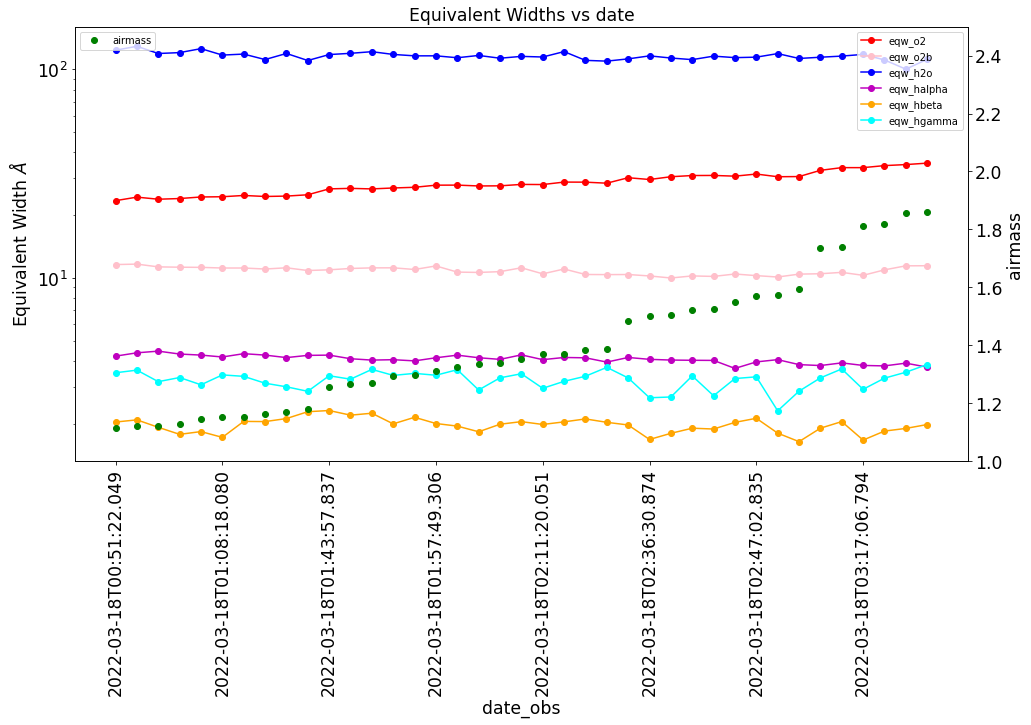

In [31]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
df_infos.plot(ax=ax,x="date_obs", y=["eqw_o2","eqw_o2b","eqw_h2o","eqw_halpha","eqw_hbeta","eqw_hgamma"],color=["r","pink","b","m","orange","cyan"],marker="o");
#plt.gcf().autofmt_xdate(rotation=90) 
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_yscale("log")

ax2 = ax.twinx()
df_infos.plot(ax=ax2,x="date_obs", y="airmass",color=["g"],marker="o",lw=0);
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax2.set_ylim(1,2.5)
ax2.xaxis.set_tick_params(rotation=90)
ax.set_title("Equivalent Widths vs date")



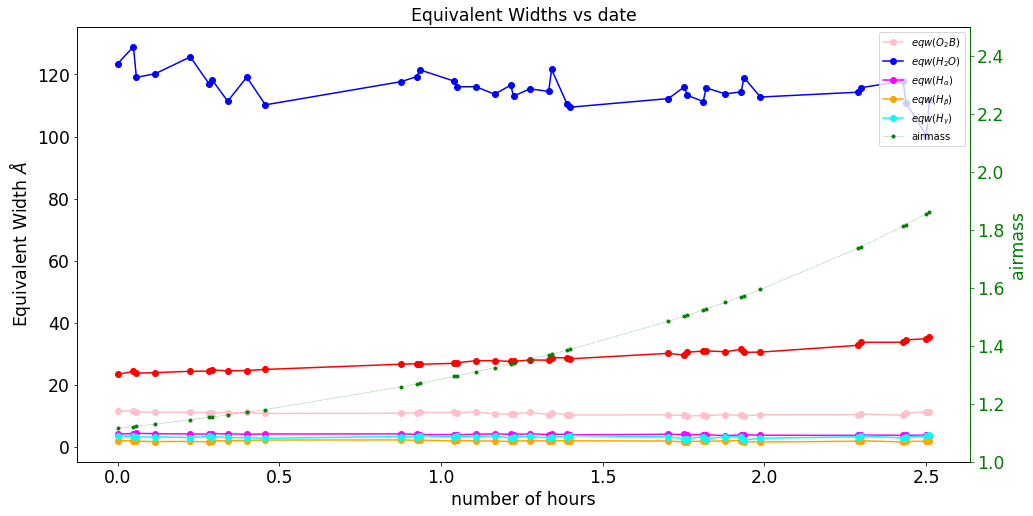

In [32]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2B)$");
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")

ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)

ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

curves = [p1, p2, p3, p4,p5,p6]
ax.legend(curves, [c.get_label() for c in curves],loc=1)
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())

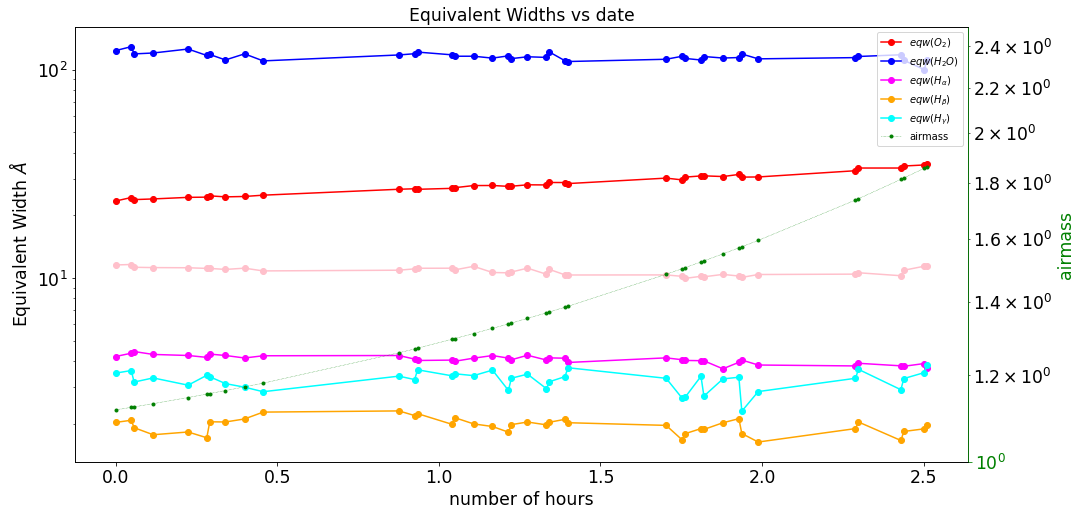

In [33]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2B)$");
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_yscale('log')
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)

ax2.set_ylabel("airmass")
ax2.set_yscale('log')
ax.set_title("Equivalent Widths vs date")

curves = [p1, p2, p3, p4, p5, p6]
ax.legend(curves, [c.get_label() for c in curves])
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())


Text(0.5, 1.0, 'Equivalent Widths vs date')

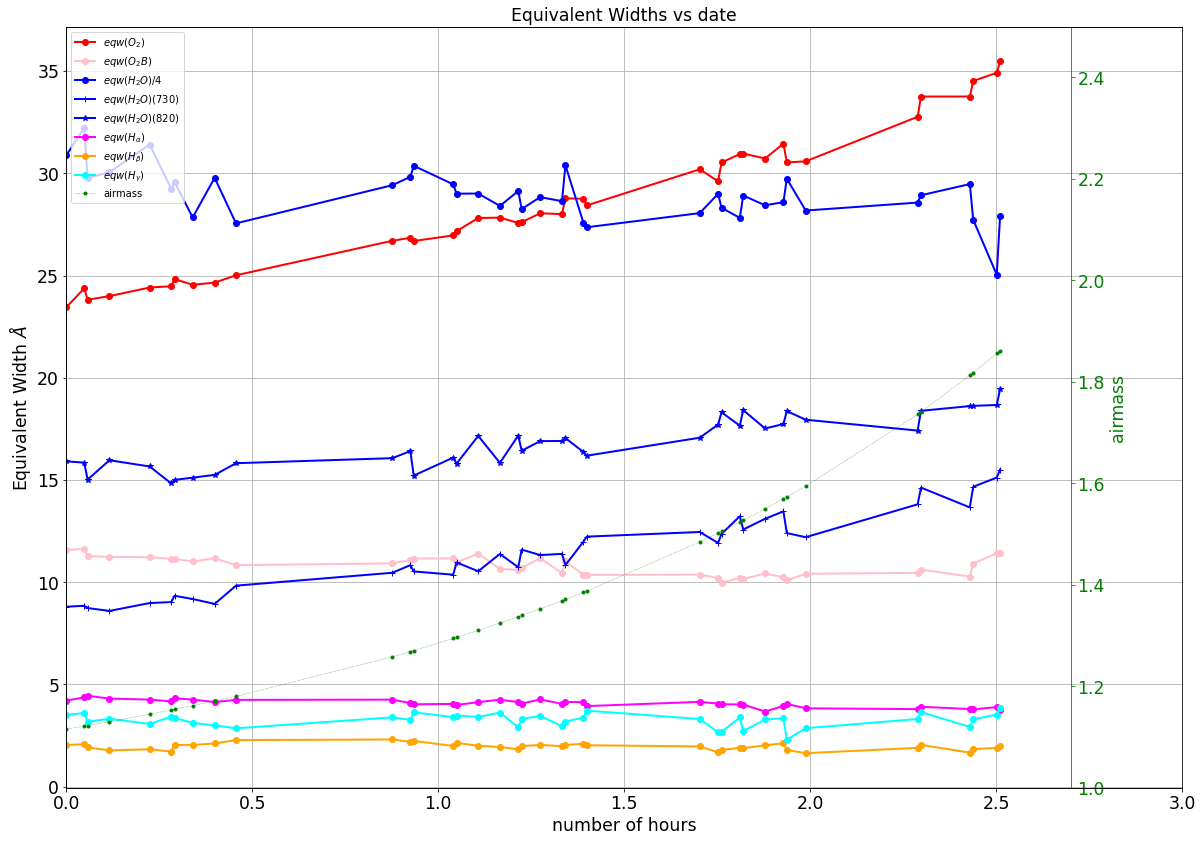

In [34]:
fig=plt.figure(figsize=(20,14))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$",lw=2);
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2B)$",lw=2);
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o']/4,marker="o",color="blue",label="$eqw(H_2O)/4$",lw=2);
p22, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o_2'],marker="+",color="blue",label="$eqw(H_2O)(730)$",lw=2);
p23, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o_3'],marker="*",color="blue",label="$eqw(H_2O)(820)$",lw=2);
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$",lw=2);
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$",lw=2);
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$",lw=2);
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.set_xlim(0,3)
ax.grid()
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_title("Equivalent Widths vs date")


# airmass
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)
ax2.set_ylabel("airmass")
ax2.spines["right"].set_position(("axes", 0.9))
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())



curves = [p1, p11 ,p2, p22, p23, p3, p4,p5,p6]


ax.legend(curves, [c.get_label() for c in curves],loc=2)
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_title("Equivalent Widths vs date")



Text(0.5, 1.0, 'Equivalent Widths vs date')

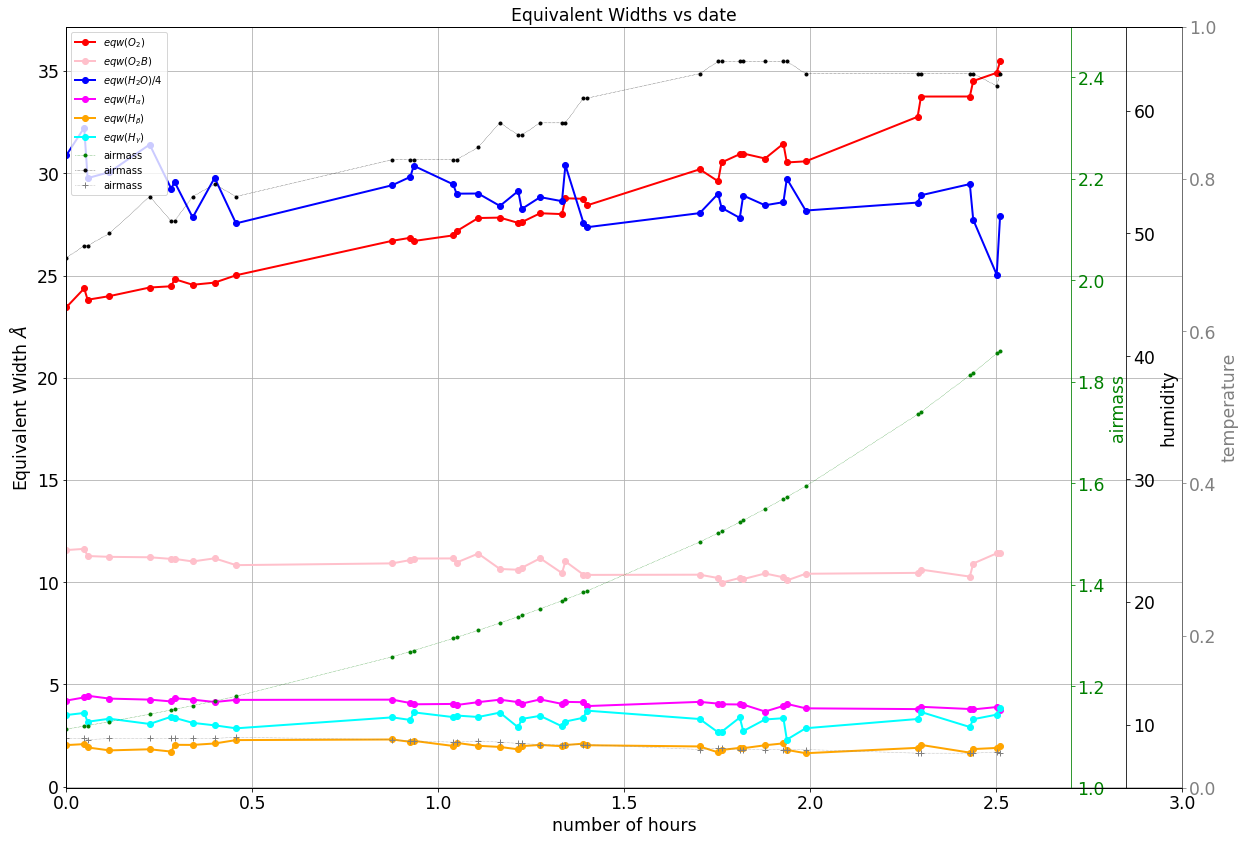

In [35]:
fig=plt.figure(figsize=(20,14))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$",lw=2);
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2B)$",lw=2);
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o']/4,marker="o",color="blue",label="$eqw(H_2O)/4$",lw=2);
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$",lw=2);
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$",lw=2);
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$",lw=2);
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.set_xlim(0,3)
ax.grid()
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_title("Equivalent Widths vs date")


# airmass
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)
ax2.set_ylabel("airmass")
ax2.spines["right"].set_position(("axes", 0.9))
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())


# humidity
ax3 = ax.twinx()
p7, = ax3.plot(df_infos['reftime'], df_infos['humidity'],linestyle='dotted', marker='.',color="black",label="airmass",lw=0.5)
ax3.set_ylabel("humidity")
ax3.spines["right"].set_position(("axes", 0.95))
ax3.yaxis.label.set_color(p7.get_color())
ax3.spines["right"].set_edgecolor(p7.get_color())
ax3.tick_params(axis='y', colors=p7.get_color())


ax4 = ax.twinx()
p8, = ax3.plot(df_infos['reftime'], df_infos['temperature'],linestyle='dotted', marker='+',color="grey",label="airmass",lw=0.5)
ax4.set_ylabel("temperature")
ax4.spines["right"].set_position(("axes", 1.0))
ax4.yaxis.label.set_color(p8.get_color())
ax4.spines["right"].set_edgecolor(p8.get_color())
ax4.tick_params(axis='y', colors=p8.get_color())


curves = [p1, p11 ,p2, p3, p4,p5,p6, p7, p8]


ax.legend(curves, [c.get_label() for c in curves],loc=2)
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_title("Equivalent Widths vs date")



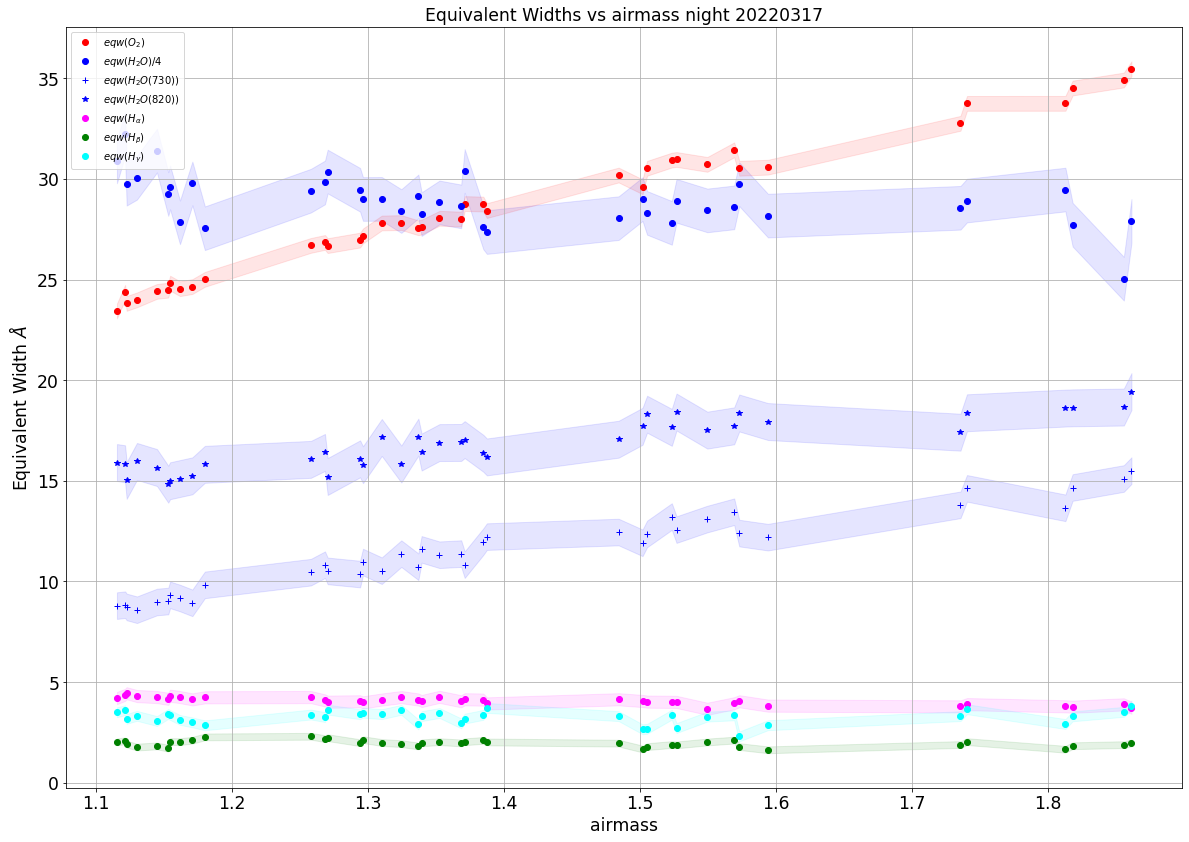

In [36]:
fact=5
fig=plt.figure(figsize=(20,14))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['airmass'], df_infos['eqw_o2'],marker="o",color="red",lw=0,label="$eqw(O_2)$");

#p11, = ax.plot(df_infos['airmass'], df_infos['eqw_o2b'],marker="o",color="pink",lw=0.5,label="$eqw(O_2B)$");
p2, = ax.plot(df_infos['airmass'], df_infos['eqw_h2o']/4,marker="o",color="blue",label="$eqw(H_2O)/4$",lw=0);
p22, = ax.plot(df_infos['airmass'], df_infos['eqw_h2o_2'],marker="+",color="blue",label="$eqw(H_2O(730))$",lw=0);
p23, = ax.plot(df_infos['airmass'], df_infos['eqw_h2o_3'],marker="*",color="blue",label="$eqw(H_2O(820))$",lw=0);
p3, = ax.plot(df_infos['airmass'], df_infos['eqw_halpha'],marker="o",color="magenta",lw=0,label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['airmass'], df_infos['eqw_hbeta'],marker="o",color="green",lw=0,label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['airmass'], df_infos['eqw_hgamma'],marker="o",color="cyan",lw=0,label="$eqw(H_{\\gamma})$");

ax.fill_between(df_infos['airmass'], df_infos['eqw_h2o']/4 - fact*df_infos['eqw_h2o_err']/4, df_infos['eqw_h2o']/4 + fact*df_infos['eqw_h2o_err']/4,color='blue',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_h2o_2'] - fact*df_infos['eqw_h2o_2_err'], df_infos['eqw_h2o_2'] + fact*df_infos['eqw_h2o_2_err'],color='blue',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_h2o_3'] - fact*df_infos['eqw_h2o_3_err'], df_infos['eqw_h2o_3'] + fact*df_infos['eqw_h2o_3_err'],color='blue',alpha=0.1)

ax.fill_between(df_infos['airmass'], df_infos['eqw_o2'] - fact*df_infos['eqw_o2_err'], df_infos['eqw_o2'] + fact*df_infos['eqw_o2_err'],color='red',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_halpha'] - fact*df_infos['eqw_halpha_err'], df_infos['eqw_halpha'] + fact*df_infos['eqw_halpha_err'],color='magenta',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_hbeta'] - fact*df_infos['eqw_hbeta_err'], df_infos['eqw_hbeta'] + fact*df_infos['eqw_hbeta_err'],color='green',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_hgamma'] - fact*df_infos['eqw_hgamma_err'], df_infos['eqw_hgamma'] + fact*df_infos['eqw_hgamma_err'],color='cyan',alpha=0.1)


#ax.axhline(eqw_halpha_sed,color='magenta')
#ax.axhline(eqw_hbeta_sed,color='green')
#ax.axhline(eqw_hgamma_sed,color='cyan')

ax.set_ylabel("Equivalent Width $\AA$")
ax.set_xlabel("airmass")
ax.grid()
ax.set_title(f"Equivalent Widths vs airmass night {DATE}")


curves = [p1,p2,p22,p23, p3, p4,p5]

ax.legend(curves, [c.get_label() for c in curves],loc=2)

In [37]:


props = dict(boxstyle='round', facecolor='white', alpha=0.5)

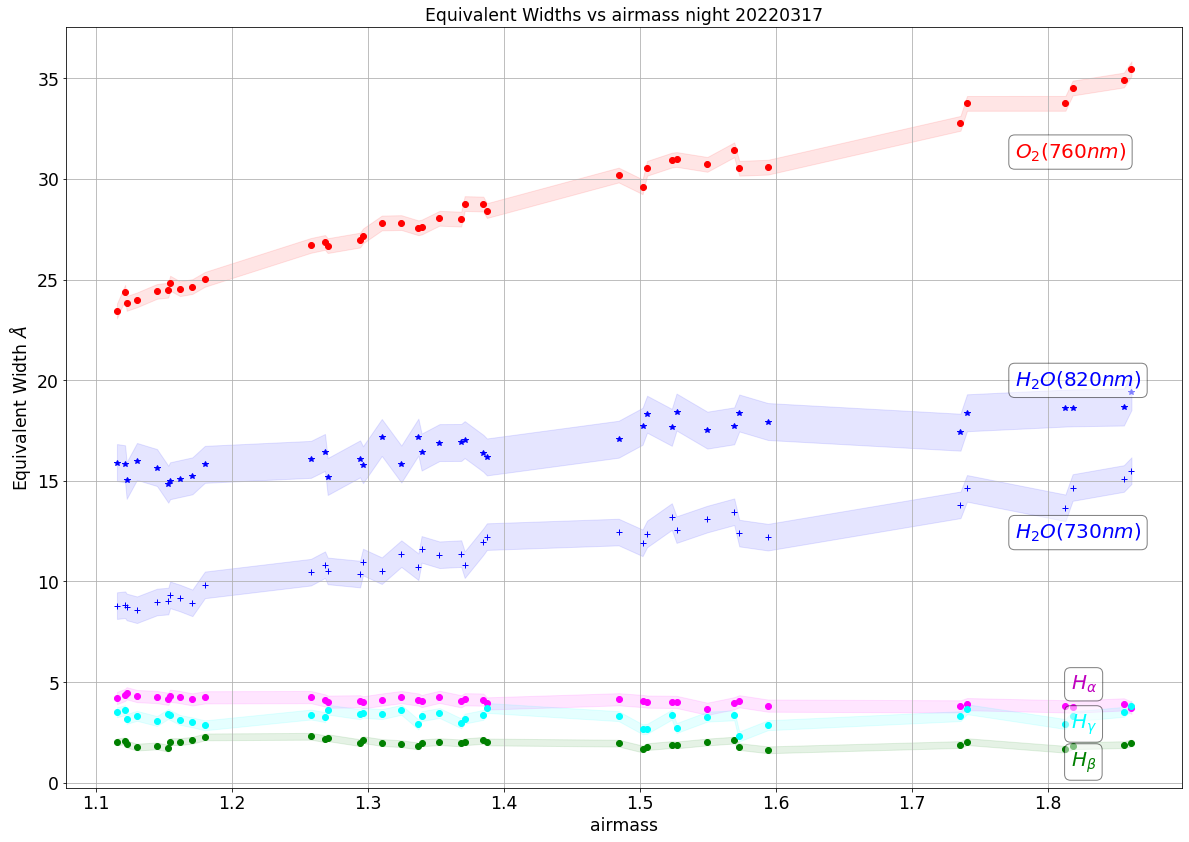

In [42]:
fact=5
fig=plt.figure(figsize=(20,14))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['airmass'], df_infos['eqw_o2'],marker="o",color="red",lw=0,label="$eqw(O_2)$");
ax.text(0.85, 0.85, "$O_2(760 nm)$" , transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props, c="r")


#p11, = ax.plot(df_infos['airmass'], df_infos['eqw_o2b'],marker="o",color="pink",lw=0.5,label="$eqw(O_2B)$");
#p2, = ax.plot(df_infos['airmass'], df_infos['eqw_h2o']/4,marker="o",color="blue",label="$eqw(H_2O)/4$",lw=0);
p22, = ax.plot(df_infos['airmass'], df_infos['eqw_h2o_2'],marker="+",color="blue",label="$eqw(H_2O(730))$",lw=0);
p23, = ax.plot(df_infos['airmass'], df_infos['eqw_h2o_3'],marker="*",color="blue",label="$eqw(H_2O(820))$",lw=0);

ax.text(0.85, 0.55, "$H_2O(820 nm)$" , transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props, c="b")
ax.text(0.85, 0.35, "$H_2O(730 nm)$" , transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props, c="b")

p3, = ax.plot(df_infos['airmass'], df_infos['eqw_halpha'],marker="o",color="magenta",lw=0,label="$eqw(H_{\\alpha})$");
ax.text(0.90, 0.15, "$H_\\alpha$" , transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props, c="m")


p4, = ax.plot(df_infos['airmass'], df_infos['eqw_hbeta'],marker="o",color="green",lw=0,label="$eqw(H_{\\beta})$");
ax.text(0.90, 0.05, "$H_\\beta$" , transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props, c="g")
p5, = ax.plot(df_infos['airmass'], df_infos['eqw_hgamma'],marker="o",color="cyan",lw=0,label="$eqw(H_{\\gamma})$");
ax.text(0.90, 0.1, "$H_\\gamma$" , transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props, c="cyan")

#ax.fill_between(df_infos['airmass'], df_infos['eqw_h2o']/4 - fact*df_infos['eqw_h2o_err']/4, df_infos['eqw_h2o']/4 + fact*df_infos['eqw_h2o_err']/4,color='blue',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_h2o_2'] - fact*df_infos['eqw_h2o_2_err'], df_infos['eqw_h2o_2'] + fact*df_infos['eqw_h2o_2_err'],color='blue',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_h2o_3'] - fact*df_infos['eqw_h2o_3_err'], df_infos['eqw_h2o_3'] + fact*df_infos['eqw_h2o_3_err'],color='blue',alpha=0.1)

ax.fill_between(df_infos['airmass'], df_infos['eqw_o2'] - fact*df_infos['eqw_o2_err'], df_infos['eqw_o2'] + fact*df_infos['eqw_o2_err'],color='red',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_halpha'] - fact*df_infos['eqw_halpha_err'], df_infos['eqw_halpha'] + fact*df_infos['eqw_halpha_err'],color='magenta',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_hbeta'] - fact*df_infos['eqw_hbeta_err'], df_infos['eqw_hbeta'] + fact*df_infos['eqw_hbeta_err'],color='green',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_hgamma'] - fact*df_infos['eqw_hgamma_err'], df_infos['eqw_hgamma'] + fact*df_infos['eqw_hgamma_err'],color='cyan',alpha=0.1)


#ax.axhline(eqw_halpha_sed,color='magenta')
#ax.axhline(eqw_hbeta_sed,color='green')
#ax.axhline(eqw_hgamma_sed,color='cyan')

ax.set_ylabel("Equivalent Width $\AA$")
ax.set_xlabel("airmass")
ax.grid()
ax.set_title(f"Equivalent Widths vs airmass night {DATE}")


curves = [p1,p2,p22,p23, p3, p4,p5]

#ax.legend(curves, [c.get_label() for c in curves],loc=2)

# With gaussian process

In [43]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

/opt/conda/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Text(0.5, 1.0, 'Equivalent Widths vs airmass night 20220317')

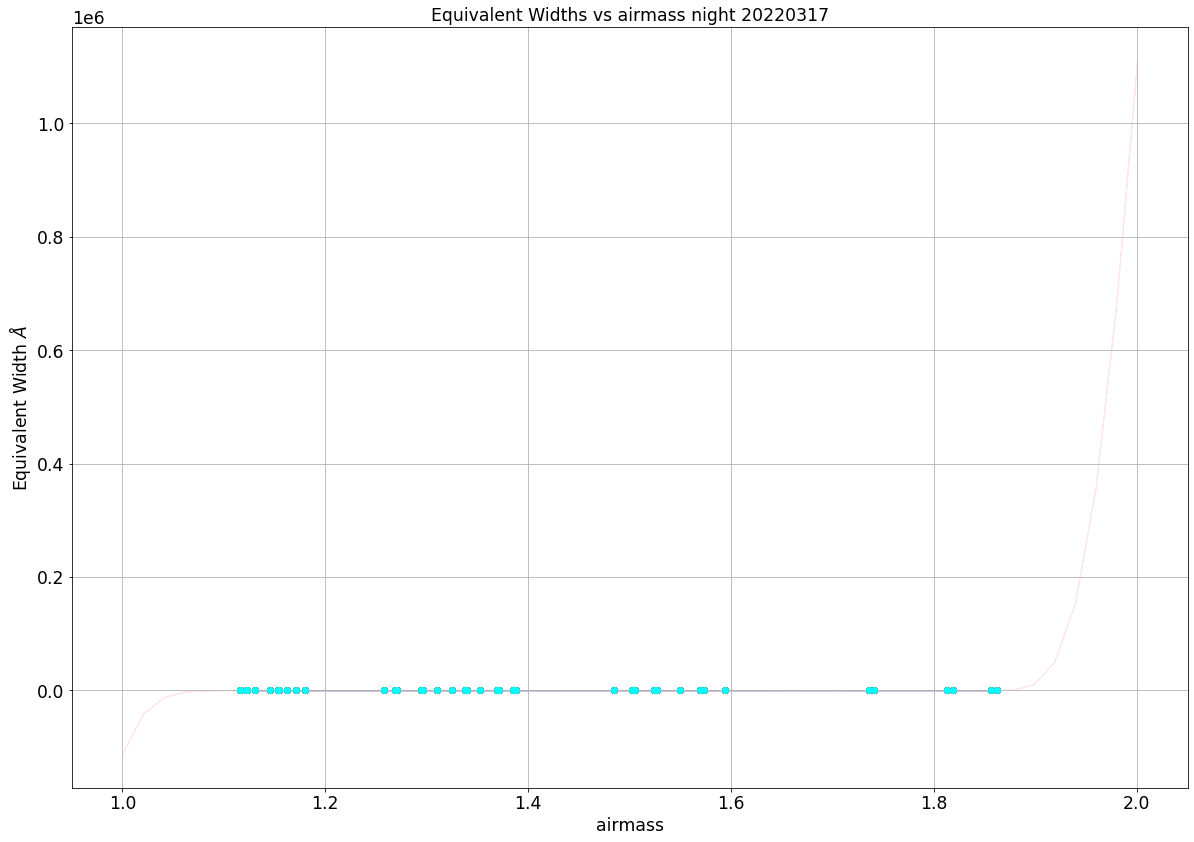

In [85]:

# airmass
X=np.linspace(1.0,2.0,50)

fact=5
fig=plt.figure(figsize=(20,14))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)

# Fit GP on O2
p1, = ax.plot(df_infos['airmass'], df_infos['eqw_o2'],marker="o",color="red",lw=0,label="$eqw(O_2)$");

y_train = np.array(df_infos['eqw_o2'].values)
X_train = np.array(df_infos['airmass'].values)
#X_train = X_train[:,np.newaxis]
X_train = (df_infos['airmass'].values).reshape(-1,1)


#kernel = 1.0 * RBF(length_scale=1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=fact*df_infos['eqw_o2_err'].values, noise_level_bounds=(fact*df_infos['eqw_o2_err']/10., fact*df_infos['eqw_o2_err']*10))
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel)

gpr.fit(X_train, y_train)
y_mean, y_std = gpr.predict(X.reshape(-1,1), return_std=True)
ax.fill_between(X, y_mean-y_std, y_mean + y_std,color='red',alpha=0.1)



#p11, = ax.plot(df_infos['airmass'], df_infos['eqw_o2b'],marker="o",color="pink",lw=0.5,label="$eqw(O_2B)$");
#p2, = ax.plot(df_infos['airmass'], df_infos['eqw_h2o']/4,marker="o",color="blue",label="$eqw(H_2O)/4$",lw=0);
p22, = ax.plot(df_infos['airmass'], df_infos['eqw_h2o_2'],marker="+",color="blue",label="$eqw(H_2O(730))$",lw=0);
p23, = ax.plot(df_infos['airmass'], df_infos['eqw_h2o_3'],marker="*",color="blue",label="$eqw(H_2O(820))$",lw=0);
p3, = ax.plot(df_infos['airmass'], df_infos['eqw_halpha'],marker="o",color="magenta",lw=0,label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['airmass'], df_infos['eqw_hbeta'],marker="o",color="green",lw=0,label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['airmass'], df_infos['eqw_hgamma'],marker="o",color="cyan",lw=0,label="$eqw(H_{\\gamma})$");

#ax.fill_between(df_infos['airmass'], df_infos['eqw_h2o']/4 - fact*df_infos['eqw_h2o_err']/4, df_infos['eqw_h2o']/4 + fact*df_infos['eqw_h2o_err']/4,color='blue',alpha=0.1)


ax.fill_between(df_infos['airmass'], df_infos['eqw_h2o_2'] - fact*df_infos['eqw_h2o_2_err'], df_infos['eqw_h2o_2'] + fact*df_infos['eqw_h2o_2_err'],color='blue',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_h2o_3'] - fact*df_infos['eqw_h2o_3_err'], df_infos['eqw_h2o_3'] + fact*df_infos['eqw_h2o_3_err'],color='blue',alpha=0.1)

ax.fill_between(df_infos['airmass'], df_infos['eqw_o2'] - fact*df_infos['eqw_o2_err'], df_infos['eqw_o2'] + fact*df_infos['eqw_o2_err'],color='red',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_halpha'] - fact*df_infos['eqw_halpha_err'], df_infos['eqw_halpha'] + fact*df_infos['eqw_halpha_err'],color='magenta',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_hbeta'] - fact*df_infos['eqw_hbeta_err'], df_infos['eqw_hbeta'] + fact*df_infos['eqw_hbeta_err'],color='green',alpha=0.1)
ax.fill_between(df_infos['airmass'], df_infos['eqw_hgamma'] - fact*df_infos['eqw_hgamma_err'], df_infos['eqw_hgamma'] + fact*df_infos['eqw_hgamma_err'],color='cyan',alpha=0.1)


#ax.axhline(eqw_halpha_sed,color='magenta')
#ax.axhline(eqw_hbeta_sed,color='green')
#ax.axhline(eqw_hgamma_sed,color='cyan')

ax.set_ylabel("Equivalent Width $\AA$")
ax.set_xlabel("airmass")
ax.grid()
ax.set_title(f"Equivalent Widths vs airmass night {DATE}")


#curves = [p1,p22,p23, p3, p4,p5]

#ax.legend(curves, [c.get_label() for c in curves],loc=2)

In [86]:
y_std

array([5.87515945e+00, 2.05324686e+00, 5.67953875e-01, 1.14293635e-01,
       1.40913838e-02, 6.38343740e-04, 5.39479661e-06, 7.62939453e-06,
       6.60724948e-06, 1.42732902e-05, 5.92200268e-05, 6.89817097e-05,
       3.07550726e-05, 6.60724948e-06, 6.60724948e-06, 8.52992240e-06,
       3.81469727e-06, 7.62939453e-06, 3.81469727e-06, 1.00927403e-05,
       5.97094568e-05, 1.24373172e-04, 1.16894176e-04, 4.34942408e-05,
       6.60724948e-06, 8.52992240e-06, 9.34406182e-06, 9.34406182e-06,
       3.81469727e-06, 1.57283998e-05, 5.93255950e-04, 3.15795883e-03,
       7.76753019e-03, 1.13310187e-02, 9.85933655e-03, 4.05090855e-03,
       5.89737886e-05, 1.65973090e-03, 4.25458130e-03, 2.29877215e-03,
       5.07512462e-05, 1.92724909e-03, 1.45008681e-04, 3.74788726e-02,
       4.41184641e-01, 2.17110579e+00, 7.05260921e+00, 1.75759831e+01,
       3.61383874e+01, 6.39698434e+01])

In [87]:
y_mean

array([-1.11081608e+05, -4.09413071e+04, -1.19433638e+04, -2.54152767e+03,
       -3.22066024e+02,  4.87996501e+00,  2.40684994e+01,  2.42679452e+01,
        2.46598647e+01,  2.51401916e+01,  2.67566460e+01,  2.79625322e+01,
        2.73957777e+01,  2.67476728e+01,  2.67262036e+01,  2.74756838e+01,
        2.76254335e+01,  2.77156464e+01,  2.82132468e+01,  2.84737117e+01,
        2.96324599e+01,  3.18554962e+01,  3.33174816e+01,  3.19868639e+01,
        3.01144598e+01,  3.01530790e+01,  3.09592028e+01,  3.13138084e+01,
        3.11353130e+01,  3.00836906e+01,  4.21577759e+01,  1.02329376e+02,
        2.22162796e+02,  3.24498032e+02,  2.94347412e+02,  1.40778259e+02,
        3.41550293e+01,  8.24656982e+01,  1.54233826e+02,  9.65496826e+01,
        3.28166504e+01,  8.77004395e+01,  3.11704712e+01,  9.88339233e+02,
        1.07229362e+04,  4.99639057e+04,  1.53069189e+05,  3.57243056e+05,
        6.81990659e+05,  1.10940770e+06])

In [81]:
X.reshape(-1,1).shape

(50, 1)

In [76]:
X.reshape(-1,1),

(array([[1.        ],
        [1.02040816],
        [1.04081633],
        [1.06122449],
        [1.08163265],
        [1.10204082],
        [1.12244898],
        [1.14285714],
        [1.16326531],
        [1.18367347],
        [1.20408163],
        [1.2244898 ],
        [1.24489796],
        [1.26530612],
        [1.28571429],
        [1.30612245],
        [1.32653061],
        [1.34693878],
        [1.36734694],
        [1.3877551 ],
        [1.40816327],
        [1.42857143],
        [1.44897959],
        [1.46938776],
        [1.48979592],
        [1.51020408],
        [1.53061224],
        [1.55102041],
        [1.57142857],
        [1.59183673],
        [1.6122449 ],
        [1.63265306],
        [1.65306122],
        [1.67346939],
        [1.69387755],
        [1.71428571],
        [1.73469388],
        [1.75510204],
        [1.7755102 ],
        [1.79591837],
        [1.81632653],
        [1.83673469],
        [1.85714286],
        [1.87755102],
        [1.89795918],
        [1

In [70]:
X_train.shape

(39, 1)

In [66]:
y_train.shape

(39,)

In [71]:
X_train

array([[1.11557477],
       [1.12157697],
       [1.12272698],
       [1.13030916],
       [1.14502999],
       [1.15333911],
       [1.15468326],
       [1.16193867],
       [1.17105276],
       [1.18024864],
       [1.25822659],
       [1.26858445],
       [1.27056341],
       [1.29439424],
       [1.29652272],
       [1.31035777],
       [1.32471669],
       [1.33727547],
       [1.33963651],
       [1.3527873 ],
       [1.36876563],
       [1.37131934],
       [1.38501167],
       [1.38764994],
       [1.48452422],
       [1.50213593],
       [1.50545658],
       [1.52365751],
       [1.52711495],
       [1.54976447],
       [1.56951977],
       [1.57324801],
       [1.59434527],
       [1.73594132],
       [1.74071538],
       [1.81309436],
       [1.81841807],
       [1.85607009],
       [1.86169155]])

In [49]:
y_train

array([23.43953571, 24.36939823, 23.81503552, 23.99273939, 24.41340857,
       24.47430644, 24.82366145, 24.54724401, 24.65314529, 25.01213013,
       26.69796804, 26.84614149, 26.68710413, 26.96290152, 27.16860481,
       27.81229044, 27.83188842, 27.57255461, 27.60869833, 28.04592768,
       28.00377833, 28.77719018, 28.75241595, 28.42714569, 30.19413628,
       29.61024318, 30.52901915, 30.93650384, 30.96691855, 30.72323508,
       31.44760276, 30.53023859, 30.58415242, 32.76366226, 33.75342032,
       33.75478208, 34.5152403 , 34.91443198, 35.47459923])

In [50]:
rng = np.random.RandomState(4)
X_train = rng.uniform(0, 5, 10).reshape(-1, 1)
y_train = np.sin((X_train[:, 0] - 2.5) ** 2)
n_samples = 5

In [54]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [55]:
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

In [56]:
X_train.shape

(10, 1)

In [57]:
y_train.shape

(10,)

In [58]:
gpr.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1), random_state=0)